# Gym Customer Churn Prediction

**Research Client:** A gym network

**Research Objective:** Analyze customer data and develop an action plan to improve customer retention. This includes:

- Predicting the probability of churn (for the next month) for each customer;
- Creating typical customer profiles: identifying key groups and characterizing their main attributes;
- Analyzing key factors that significantly influence churn;
- Formulating key findings and developing recommendations to improve customer relations, including:
- Identifying target customer groups;
- Proposing measures to reduce churn;
- Highlighting other aspects of customer interaction.

**The study consists of 5 steps:**
1. Data Overview
2. Exploratory Data Analysis (EDA)
3. Building a churn prediction model
4. Customer clustering
5. Formulating conclusions and drafting initial recommendations for customer engagement

**Data Description**
File: `/datasets/gym_churn.csv`

*Customer data for the month preceding the churn check:*

- `gender` — gender;
- `Near_Location` — customer lives or works near the fitness center;
- `Partner` — customer is an employee of a partner company (partner companies offer their employees discounts on gym memberships, and the fitness center stores employer information);
- `Promo_friends` — customer initially joined via the "Bring a Friend" promotion (used a friend's promo code for the first membership payment);
- `Phone` — availability of a contact phone number;
- `Age` — customer’s age;
- `Lifetime` — duration since the customer’s first visit to the fitness center (in months).

*Information based on visit logs, purchases, and the customer’s current membership status:*

- `Contract_period` — duration of the current membership (1 month, 6 months, or 1 year);
- `Month_to_end_contract` — months remaining until the membership expires;
- `Group_visits` — attendance of group classes;
- `Avg_class_frequency_total` — average weekly attendance since the start of the membership;
- `Avg_class_frequency_current_month` — average weekly attendance during the previous month;
- `Avg_additional_charges_total` — total revenue from additional services (café, sports goods, spa, and massage services);
- `Churn` — whether the customer churned during the current month.

## Data Overview

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Reading the data file and saving it to a variable
gym_data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# Displays the first 5 rows of the dataset to get an initial overview of the data
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Exploratory Data Analysis (EDA)

### Analysis of Missing Values, Means, and Standard Deviations

> Let's examine the dataset: check for missing values, calculate the means, and study the standard deviations.

In [4]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

> - The dataset contains 14 columns, each with 4,000 entries.
> - No explicit missing values were found in the dataset.

In [5]:
gym_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


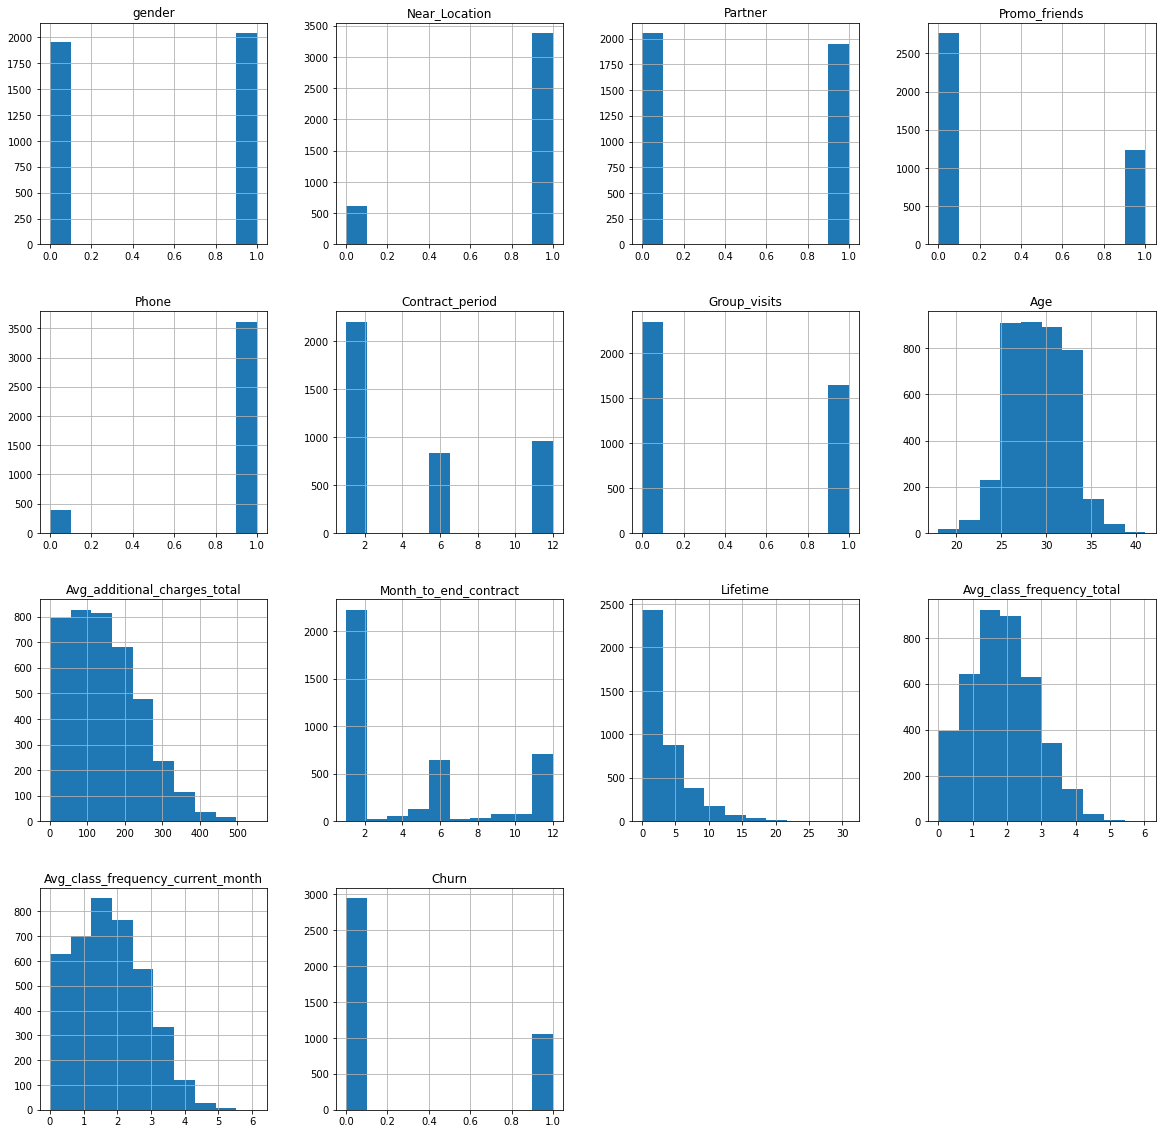

In [6]:
gym_data.hist(figsize=(20, 20));

#### **Additional Insights from the Dataset**

*Customer Distribution by Gender:*

- The dataset is balanced in terms of gender, with males and females making up approximately 51% and 49% of the sample, respectively.

*Proximity to Gyms:*

- A significant portion of customers (84.5%) live or work near the fitness centers, suggesting proximity is a key factor for membership.

*Partnership Programs:*

- Almost half (48.7%) of the customers are employees of partner companies, indicating that corporate partnerships are an important source of clientele.

*Promotional Engagement:*

- About 30.9% of customers joined through the "Bring a Friend" promotion, showing its moderate popularity.

*Contact Information:*

- The vast majority of customers (90.4%) have provided their phone numbers, facilitating communication and marketing efforts.

*Contract Durations:*

- The average contract period is 4.7 months, with a range of 1 to 12 months. The most common contract durations are short-term (1 month) and medium-term (6 months).

*Group Classes:*

- Only 41.2% of customers participate in group classes, which may indicate either low interest or limited availability of such activities.

*Age Range of Customers:*

- The customer age spans from 18 to 41 years, with a median age of 29. The gym primarily attracts young adults.

*Revenue from Additional Services:*

- There is substantial variability in spending on additional services (`Avg_additional_charges_total`), with values ranging from €0.15 to €552.59. The median spending is €136.22.

*Membership Lifetime:*

- The median customer has been a member for 3 months, but some have maintained memberships for over 2.5 years, reflecting diverse customer retention patterns.

*Visit Frequency:*

- The average total weekly attendance frequency is 1.9, with some customers attending as frequently as 6 times per week. The current month's frequency is slightly lower, at 1.77 on average.

*Churn Rate:*

- The churn rate is 26.5%, indicating that approximately one in four customers do not renew their memberships monthly.

*Outliers and Anomalies:*

- No significant outliers or anomalies were detected in the dataset, indicating data consistency and reliability.

#### **Key Observations**
- Revenue Insights: The high variability in spending on additional services may be a valuable area for increasing revenue.
- Target Groups: Customers near the fitness centers and those employed by partner companies represent key demographics.
- Retention Challenge: The churn rate suggests significant room for improvement in customer retention strategies.

### Analysis of Feature Values in Two Groups

> Let's compare the average feature values between two groups: customers who churned and those who remained.

In [7]:
# Grouping the data by the 'Churn' column and calculating the mean values of features for each group
churn_group = gym_data.groupby('Churn').mean()
churn_group.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Bar Histograms of Feature Distributions for Two Groups

> Let's plot bar histograms to visualize the distribution of features for customers who churned (churn group) and those who stayed (non-churn group).

In [8]:
# Filtering the data for churned and retained customers
churned_data = gym_data[gym_data['Churn'] == 1]
retained_data = gym_data[gym_data['Churn'] == 0]

In [9]:
# List of features to be analyzed for comparing churned and retained customers
features_to_analyze = ['gender','Near_Location', 'Partner', 'Promo_friends',
                       'Phone', 'Contract_period', 'Group_visits', 'Age',
                       'Avg_additional_charges_total','Month_to_end_contract',
                       'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

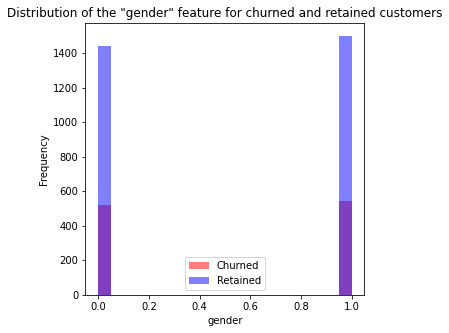

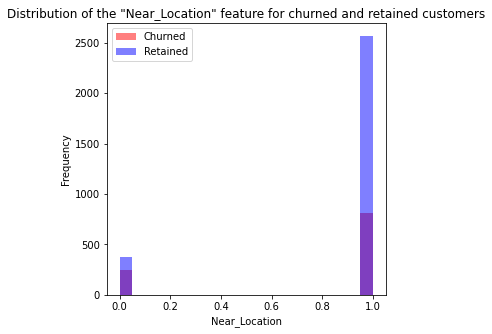

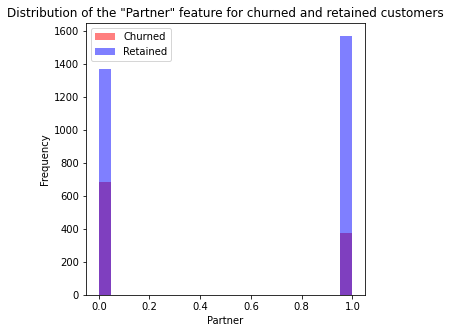

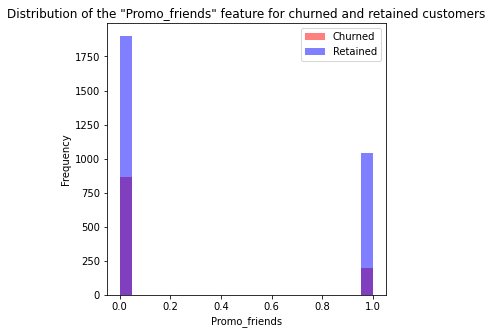

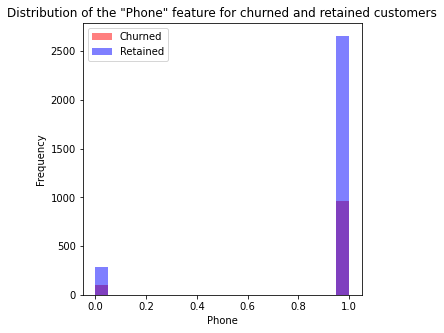

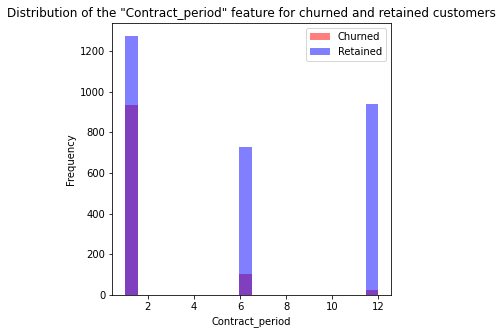

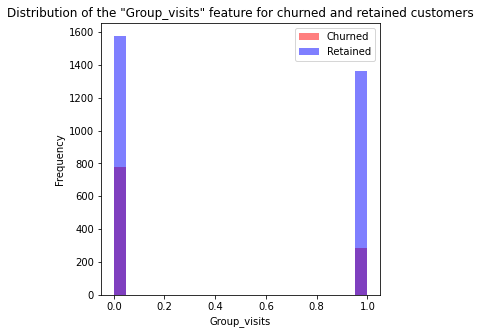

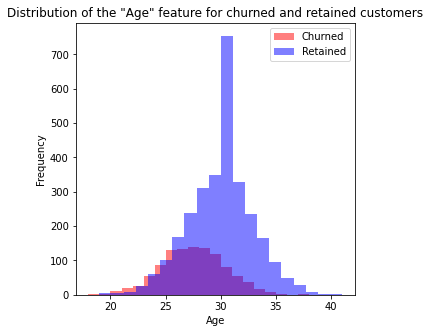

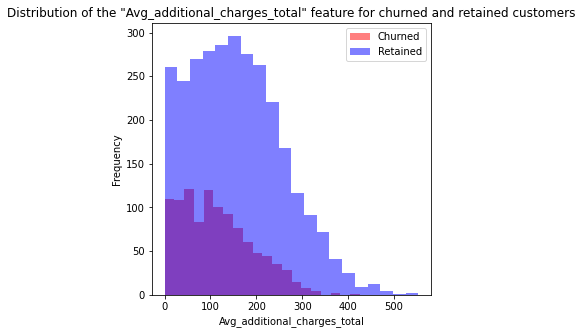

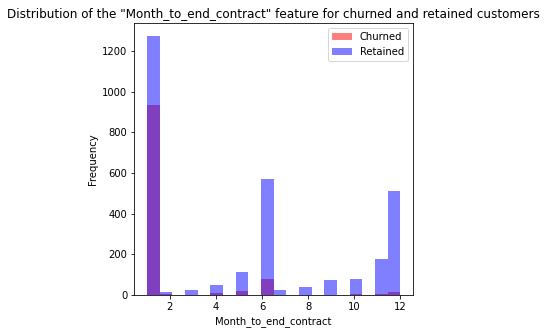

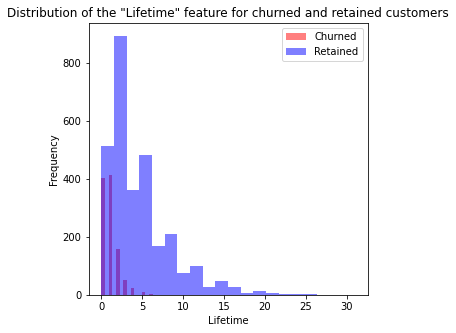

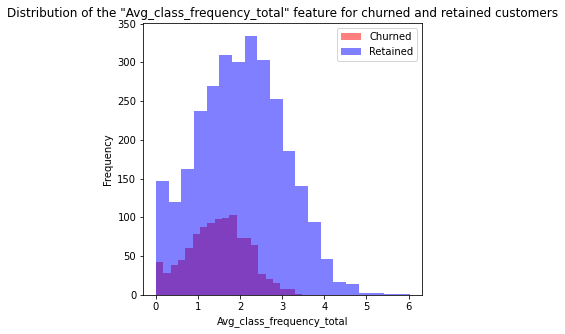

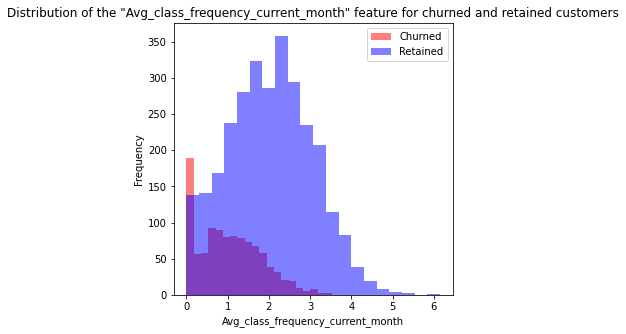

In [10]:
# Creating bar histograms for each feature to compare churned and retained customers
for feature in features_to_analyze:
    plt.figure(figsize=(5, 5))
    plt.hist(churned_data[feature], bins=20, alpha=0.5, color='red', label='Churned')
    plt.hist(retained_data[feature], bins=20, alpha=0.5, color='blue', label='Retained')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of the "{feature}" feature for churned and retained customers')
    plt.show()

#### Additional Insights

- The same proportion of both men and women left the gym this month.
- More than half of the customers who do not live or work near the gym have left.
- A smaller percentage of customers who participated in the partner program have churned.
- Nearly half of the customers who used a friend’s promo code have left the gym.
- Customers typically leave the gym after their monthly membership expires.
- Churned customers attended group classes less frequently.
- The average age of churned customers is 27 years, while the average age of those who continue attending the gym is around 30. This is logical, as older customers tend to have more established daily routines, often accompanied by greater discipline. Additionally, physical activity becomes more important for health as people age.
- The total revenue from churned customers is significantly lower.
- The majority of churned customers attended the gym about 1.5 times per week, while those who remain were attending approximately 2 times per week.

### Correlation Matrix

> Let's build and display the correlation matrix.

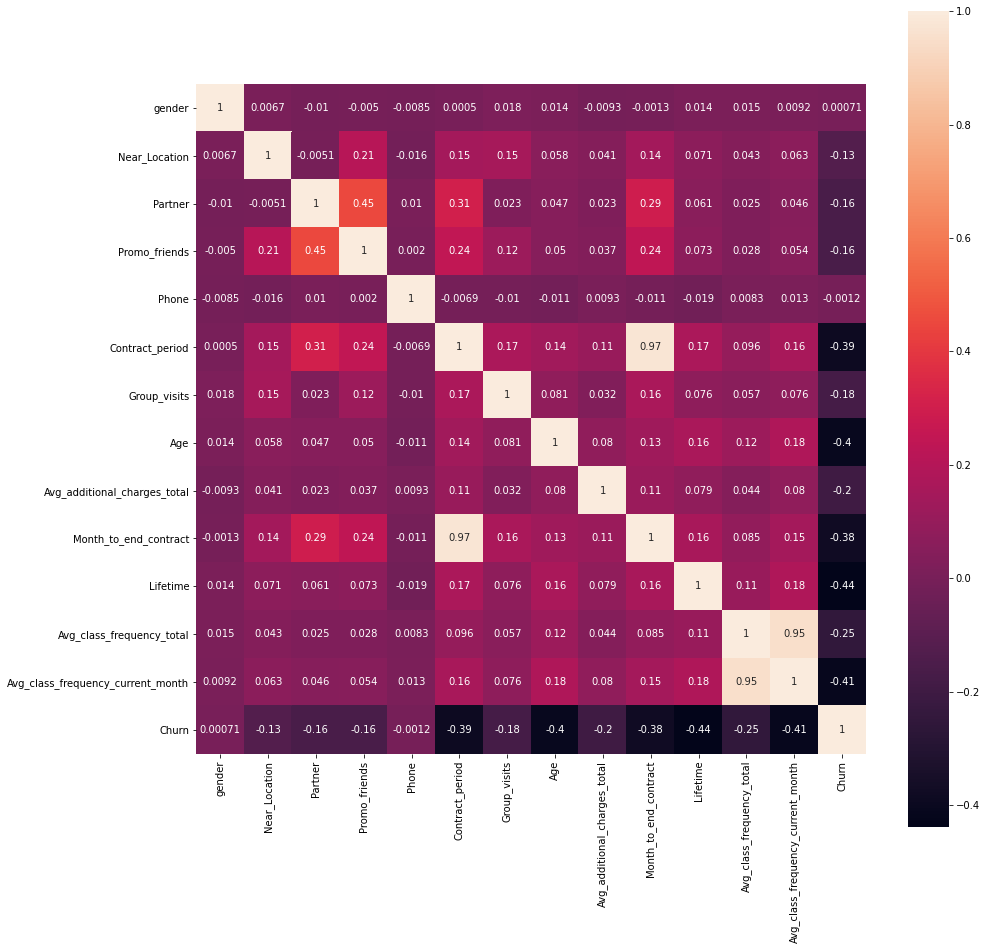

In [11]:
# Correlation Matrix
corr_m = gym_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_m, square=True, annot=True)
plt.show()

#### Additional Insights

*Strong correlation is observed between:*
- `Contract_period` and `Month_to_end_contract` -- 0.97;
- `Avg_class_frequency_total` and `Avg_class_frequency_current_month` -- 0.95.

To eliminate multicollinearity, we will remove pairs of columns with strong correlation from the dataframe.

*Moderate correlation is observed between:*
- `Promo_friends` and `Partner` -- 0.45;
- `Churn` and `Lifetime` -- -0.44;
- `Churn` and `Avg_class_frequency_current_month` -- -0.41;
- `Churn` and `Age` -- -0.4;
- `Churn` and `Contract_period` -- -0.39;
- `Churn` and `Month_to_end_contract` -- -0.38.

In [12]:
# Removing pairs of highly correlated features
gym_data.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis=1, inplace=True)

In [13]:
gym_data.shape

(4000, 12)

### Interim Conclusions

*General Observations:*

- The dataset consists of 14 columns with 4,000 entries each, without any explicit missing values.
- The gender distribution is nearly balanced, with males at 51% and females at 49%.
- A significant portion of customers (84.5%) live or work near the fitness centers, highlighting the importance of proximity in attracting members.
- Nearly half of the customers (48.7%) are part of corporate partnership programs, which indicates that these partnerships are a major source of clientele.
- Around 30.9% of customers joined through the "Bring a Friend" promotion, demonstrating moderate success of this marketing tactic.
- The dataset shows that 90.4% of customers have provided phone numbers, facilitating communication and targeted marketing efforts.

*Customer Demographics and Behavior:*

- The average contract period is 4.7 months, with a common preference for short-term (1 month) and medium-term (6 months) memberships.
- Group class participation is relatively low, with only 41.2% of customers engaging in these activities, suggesting either limited interest or availability.
- The customer age range spans from 18 to 41 years, with a median age of 29, indicating that the gym primarily attracts young adults.
- There is substantial variability in spending on additional services, with the median amount spent on such services being €136.22. This presents an opportunity to explore ways to increase revenue in this area.

*Churn Analysis:*

- The churn rate is 26.5%, meaning approximately one in four customers do not renew their memberships. This suggests a significant opportunity for improving retention strategies.
- Both men and women have churned at the same rate this month, and more than half of the customers who do not live or work near the gym have left.
- Customers who participated in the partner program exhibited a lower churn rate, which could highlight the potential value of this program.
- Nearly half of the customers who used a friend's promo code left the gym, which might indicate that this promotional approach could be re-evaluated for effectiveness.
- Churned customers typically leave after their monthly membership expires and attend group classes less frequently than those who stay. Additionally, churned customers have an average age of 27 years, compared to 30 years for those who remain, suggesting that older clients tend to have more established routines and greater discipline around fitness.
- The total revenue from churned customers is significantly lower, and churned customers generally attended the gym less frequently—about 1.5 times per week compared to 2 times per week for those who remained.

*Correlation Insights:*

- A very strong correlation (0.97) is observed between the contract period (`Contract_period`) and the time remaining on the contract (`Month_to_end_contract`). Similarly, the correlation between total class frequency (`Avg_class_frequency_total`) and current month's class frequency (`Avg_class_frequency_current_month`) is also strong (0.95). These high correlations indicate multicollinearity, so these columns will be removed from the dataset to improve model accuracy.
- Moderate correlations were also observed between several features related to churn, such as the relationship between `Promo_friends` and `Partner` (0.45) and `Churn` with other variables like `Lifetime`, `Avg_class_frequency_current_month`, `Age`, `Contract_period`, and `Month_to_end_contract`, which may provide useful insights for further analysis.

### Preliminary Hypotheses

The analysis of the available data leads to the following preliminary hypotheses:

- *Age and Customer Activity:* Younger customers (approximately under 30) are more likely to churn compared to older customers. This may be due to younger individuals having less stable routines or more fluctuating interests, which can impact their long-term loyalty to the gym.

- *Membership Duration and Promo Codes:* Customers with short-term memberships (e.g., 1-month subscriptions) are more prone to leaving the gym. Additionally, promotional codes may not be effective for customer retention. This could be because customers who joined via promotions might not have the same level of loyalty or long-term commitment to fitness.

- *Visit Frequency and Group Classes:* Customers who visit the gym less frequently or do not participate in group classes are at a higher risk of churning. Group classes may provide extra motivation and social interaction, which can enhance customer retention.

- *Overall Spending and Revenue:* Customers with lower total spending are more likely to leave the gym. It is important to develop strategies to increase overall spending, as higher engagement in additional services can enhance customer loyalty.

- *Partnership Programs and Proximity:* Customers attracted through partnership programs may exhibit stronger loyalty and are more likely to remain members for the long term. Additionally, customers who live or work close to the gym are less likely to churn, suggesting that proximity plays a key role in retention.

- *Contract Length and Remaining Term:* The remaining contract duration may significantly influence a customer’s decision to leave the gym. Customers with a short remaining contract period are at a higher risk of quitting once their contract expires.

## Customer Churn Prediction Model

### Binary Classification Model for Customer Churn

> We will develop a binary classification model to predict whether a customer will churn in the following month. The target variable is the churn status:
> * Split the data into training and validation sets using the train_test_split() function.
> * Train the model on the training set using two approaches:
> 1. Logistic Regression
> 2. Random Forest

> Evaluating the metrics accuracy, precision, and recall for both models on the validation set and comparing their performance.

#### Logistic Regression Model

In [14]:
# Splitting the data into features (matrix X) and target variable (y)
X = gym_data.drop('Churn', axis = 1)
y = gym_data['Churn']

In [15]:
# Dividing the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
# Training the logistic regression model
log_reg_model = LogisticRegression(solver='liblinear')
log_reg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
# Generating predictions for the validation set
y_pred_log_reg = log_reg_model.predict(X_test)

In [18]:
y_pred_log_reg 

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [19]:
# Calculating performance metrics for the logistic regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

In [20]:
# Displaying the performance metrics for the logistic regression model
print("Performance metrics for the logistic regression model:")  
print(f"Accuracy: {accuracy_log_reg:.2f}")  
print(f"Precision: {precision_log_reg:.2f}")  
print(f"Recall: {recall_log_reg:.2f}")  

Performance metrics for the logistic regression model:
Accuracy: 0.88
Precision: 0.76
Recall: 0.77


#### Random Forest Model

In [21]:
# Training the random forest model
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [22]:
y_pred_random_forest = random_forest_model.predict(X_test)

In [23]:
y_pred_random_forest

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [24]:
# Calculating performance metrics for the random forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)

In [25]:
# Displaying the performance metrics for the random forest model
print("\nPerformance metrics for the random forest model:")  
print(f"Accuracy: {accuracy_random_forest:.2f}")  
print(f"Precision: {precision_random_forest:.2f}")  
print(f"Recall: {recall_random_forest:.2f}")  


Performance metrics for the random forest model:
Accuracy: 0.89
Precision: 0.78
Recall: 0.77


### Intermediate Findings

Both models demonstrate relatively high accuracy in predicting customer churn, indicating that they perform well overall. However, an analysis of the precision and recall metrics reveals the following:

- Precision: The random forest model has a slightly higher precision (0.78) compared to the logistic regression model (0.76). This suggests that the random forest model is more accurate in identifying customers who will actually churn.

- Recall: Both models achieve the same recall score (0.77), indicating that they are equally effective in identifying true positive cases of customer churn.

Comparing the metrics, the random forest model performs slightly better than the logistic regression model. However, the difference in metric values is marginal.

## Customer Clustering

1. Perform customer clustering: Standardize the data. Build a distance matrix using the linkage() function on the standardized feature matrix and visualize it with a dendrogram.

2. Train a clustering model: Use the K-Means algorithm to create clusters and predict customer clusters.

3. Analyze cluster characteristics: Create feature distributions for each cluster. Calculate the churn rate for each cluster.

In [26]:
# Standardize the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [27]:
linked = linkage(X_sc, method = 'ward') 

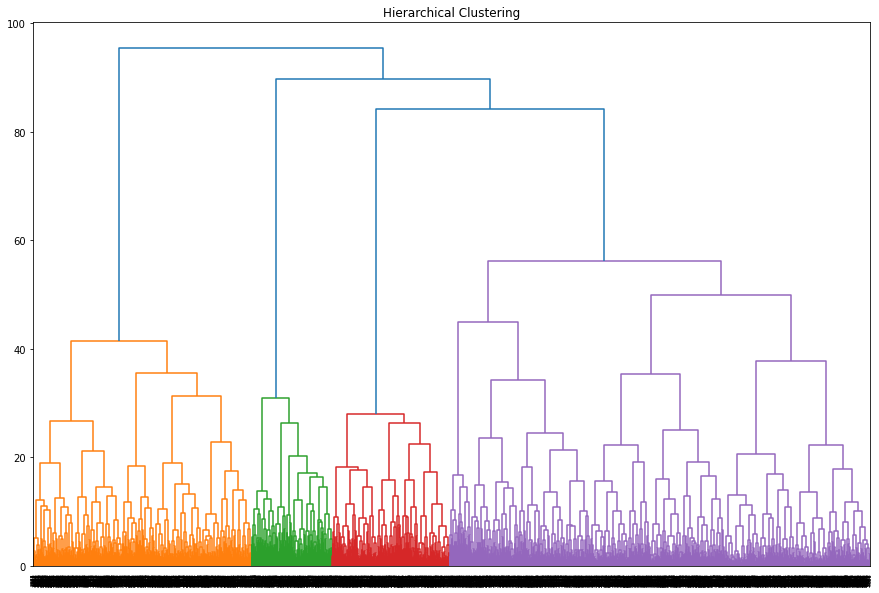

In [28]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering')
plt.show()

In [29]:
# Based on the dendrogram, assume there are 5 clusters
n_clusters = 5

In [30]:
# Train the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(X_sc)

In [31]:
# Add cluster information to the original dataset
gym_data['Cluster'] = clusters

In [32]:
cluster_means = gym_data.groupby('Cluster').mean()
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
Cluster,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


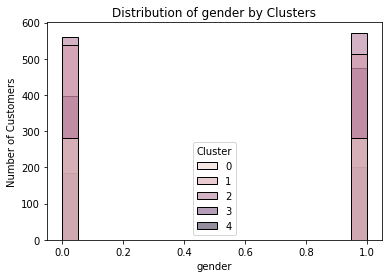

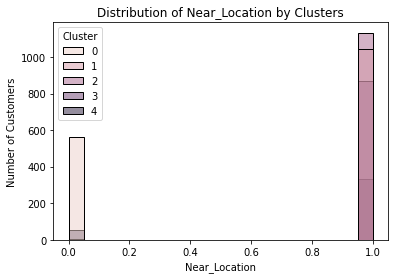

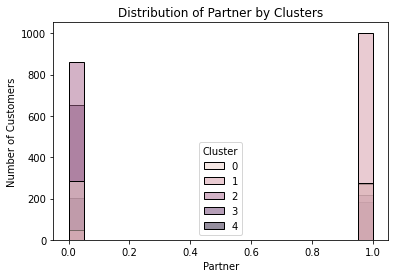

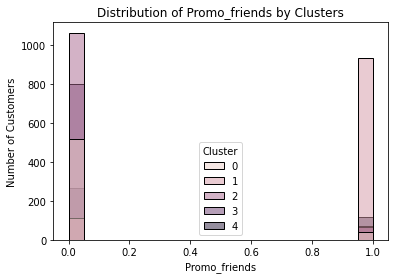

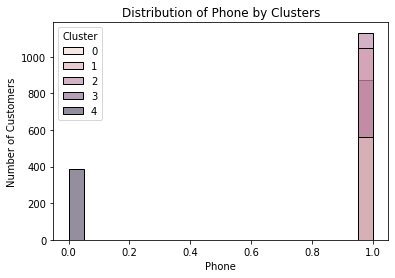

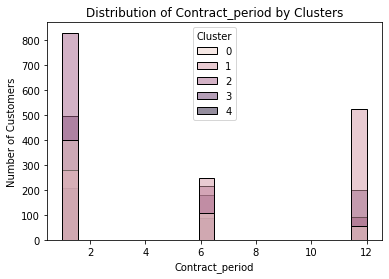

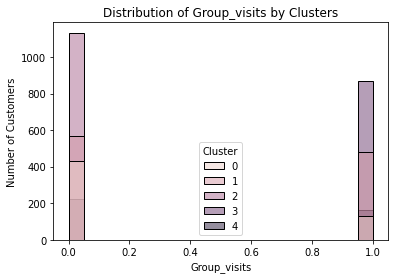

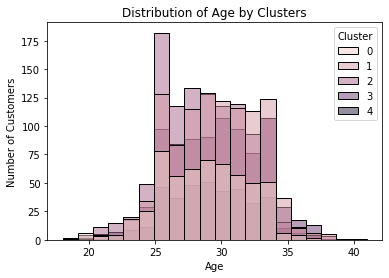

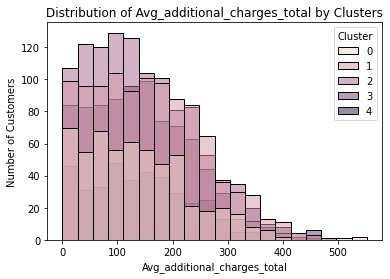

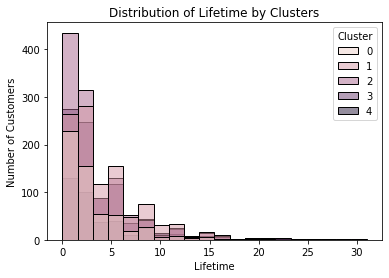

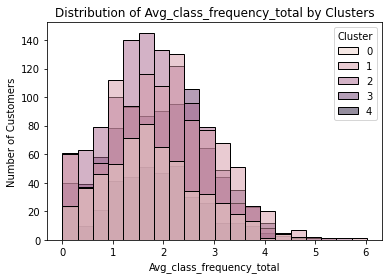

In [33]:
for column in X.columns:
    plt.figure()
    sns.histplot(data=gym_data, x=column, hue='Cluster', bins=20)
    plt.title(f'Distribution of {column} by Clusters')
    plt.xlabel(column)
    plt.ylabel('Number of Customers')
    plt.show()

In [34]:
churn_percentage = gym_data.groupby('Cluster')['Churn'].mean()
churn_percentage

Cluster
0    0.399287
1    0.120952
2    0.381625
3    0.200918
4    0.266839
Name: Churn, dtype: float64

### Intermediate Findings

An analysis of the average feature values for each cluster highlights the following characteristics:

**Cluster 0:**

- Nearly all clients neither live nor work near the fitness center.
- Almost half of the clients participate in the partner program.
- Very few clients joined through referral promo codes.
- Almost all clients provided their phone numbers (likely a program requirement).
- The average duration of the current contract is about 3 months.
- The cluster has a noticeably low average number of group class attendances, possibly due to inconvenient scheduling for this group.
- The average client age is around 29 years.
- Average additional service spending is approximately 137.54.
- The average client lifetime is about 3 months.
- The average frequency of gym visits is around 1.77 times per week, the lowest among all clusters.
- The churn rate in this cluster is about 40%, the highest among all clusters.

**Cluster 1:**

- Nearly all clients live or work near the fitness center.
- Almost all clients participate in the partner program and joined through referral promo codes.
- All clients provided their phone numbers.
- The average duration of the current contract is about 7.66 months.
- Approximately 46% of clients attend group classes.
- The average client age is about 29.54 years.
- Average additional service spending is approximately 155.86.
- The average client lifetime is about 4.38 months.
- The average frequency of gym visits is around 1.98 times per week.
- The churn rate in this cluster is about 12%, the lowest among all clusters.

**Cluster 2:**

- Nearly all clients live or work near the fitness center.
- A low proportion of clients (around 24%) participate in the partner program.
- Few clients joined through referral promo codes.
- All clients provided their phone numbers.
- The average duration of the current contract is about 2.82 months.
- This cluster has a low average number of group class attendances (participation is zero).
- The average client age is about 28.77 years.
- Average additional service spending is approximately 143.38.
- The average client lifetime is about 3.34 months.
- The average frequency of gym visits is around 1.80 times per week.
- The churn rate in this cluster is about 38%.

**Cluster 3:**

- Nearly all clients live or work near the fitness center.
- A low proportion of clients (about 25%) participate in the partner program.
- Few clients joined through referral promo codes, the lowest percentage among all clusters.
- All clients provided their phone numbers.
- The average duration of the current contract is about 4.53 months.
- Nearly all clients participate in group classes.
- The average client age is about 29.54 years.
- Average additional service spending is approximately 148.09.
- The average client lifetime is about 3.76 months.
- The average frequency of gym visits is around 1.94 times per week.
- The churn rate in this cluster is about 20%.

**Cluster 4:**

- Most clients live or work near the fitness center.
- Approximately half of the clients participate in the partner program.
- Nearly a third of the clients joined through referral promo codes.
- Few clients provided their phone numbers.
- The average duration of the current contract is about 4.78 months.
- Clients participate in group classes.
- The average client age is about 29.30 years.
- Average additional service spending is approximately 144.21.
- The average client lifetime is about 3.94 months.
- The average frequency of gym visits is around 1.85 times per week.
- The churn rate in this cluster is about 27%.

## Conclusions and Basic Recommendations for Working with Clients

Based on the analysis of customer clusters, the following conclusions can be drawn, along with key recommendations for client management:

**Cluster 0:**

- *Key Insight:* This cluster has the highest churn rate (around 40%), indicating it is the most vulnerable group of clients. Key factors contributing to churn include low fitness center visit frequency (around 1.77 times per week) and a short contract duration (around 3 months).
- *Recommendations:* Offer attractive incentives to extend contracts for a longer term, as this could increase client loyalty. Consider offering personalized fitness plans to boost engagement and visit frequency.

**Cluster 1:**

- *Key Insight:* This cluster has the lowest churn rate (around 12%), indicating stability and high loyalty. Clients here are highly engaged in the partnership program, joined through friend referral promo codes, and actively participate in group classes.
- *Recommendations:* Maintain a high level of service and offer attractive conditions for this cluster. Ensure regular communication and personalized offers to retain their loyalty and engagement.

**Cluster 2:**

- *Key Insight:* This cluster shows a high churn rate (around 38%), with clients having a low contract duration (around 2.82 months) and no participation in group classes.
- *Recommendations:* Provide appealing offers to extend contracts and encourage participation in group classes. Consider offering trial group sessions or promotions to increase engagement and client retention.

**Cluster 3:**

- *Key Insight:* Cluster 3 has a moderate churn rate (around 20%), indicating stable client behavior. Clients here are active in group classes and have a relatively good contract duration (around 4.53 months).
- *Recommendations:* Focus on maintaining and strengthening participation in group activities. Offer more competitive pricing for long-term contracts to enhance client loyalty and reduce churn.

**Cluster 4:**

- *Key Insight:* This cluster has a moderate churn rate (around 27%). Clients here have an average contract duration of 4.78 months and actively participate in group classes.
- *Recommendations:* Implement initiatives to improve retention and contract extensions. Offering personalized services or exclusive group sessions could help keep clients engaged and encourage contract renewal.

**General Recommendations for Client Management:**
- Leverage Partnership Programs and Promo Codes. Actively utilize referral programs and promo codes to attract new clients and enhance retention.
- Encourage Group Class Participation. Encourage clients to join group classes, as this is strongly linked to a lower churn rate.
- Offer Incentives for Longer Contracts. Provide attractive proposals for extending contracts, helping to improve client retention and loyalty.
- Focus on Service Quality. Strive to enhance the level of service and customer experience to increase loyalty and reduce churn across all clusters.